In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Import data
train = pd.read_csv('Train.csv')


In [3]:
# print shape 
print('train data shape :', train.shape)

train data shape : (39650, 3)


In [4]:
# Inspect Data by shing the first five rows 
train.head(10)

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
5,ID_0052TYKI,"Yes men rape women. But women also rape men, y...",sexual_violence
6,ID_0058QG76,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
7,ID_005VM1DJ,Pretty sure he raped a 16yr old girl with 2 fr...,sexual_violence
8,ID_0060BW8R,TW sorry to hear that and yeah he recently th...,sexual_violence
9,ID_007FAIEI,"""I understand that... My father was abusive as...",sexual_violence


In [5]:
train['type'].value_counts(ascending=True) 

Harmful_Traditional_practice      188
economic_violence                 217
emotional_violence                651
Physical_violence                5946
sexual_violence                 32648
Name: type, dtype: int64

In [6]:
# Importing modules used to remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Martin
[nltk_data]     Msuya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#remove id feature 

train = train.drop('Tweet_ID', axis=1)


In [8]:
# loading important libraries
from nltk.corpus import stopwords # importing stopwords
from nltk.stem import PorterStemmer
import re # used for text persing

stemmer = PorterStemmer()
words = stopwords.words("english")

train['processedtext'] = train['tweet'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [9]:
train.head(7)

,tweet,type,processedtext
0,Had a dream i got raped last night. By a guy i...,sexual_violence,had dream got rape last night by guy work actu...
1,he thought the word raped means sex and told m...,sexual_violence,thought word rape mean sex told saw dog rape e...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talk to me i wa rape by men molest he ...
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence,i sexual abus year age no one believ i rape br...
4,Chessy Prout can do better by telling the trut...,sexual_violence,chessi prout better tell truth by sell owen la...
5,"Yes men rape women. But women also rape men, y...",sexual_violence,ye men rape women but women also rape men yet ...
6,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence,my husband beat me frequent wife tell court


## Convert Into Lower case and Removing Punctuation from text

In [10]:
# Convert into lower case
train['processedtext']= train['processedtext'].str.lower()


In [11]:
# Removing Punctuation from the Tweets
import string

train['processedtext']= train['processedtext'].str.strip(string.punctuation)


In [12]:
# Removing Intergers from the tweets
train['processedtext'] = [x for x in train['processedtext'] if not isinstance(x, int)]


In [13]:
# Removing Emojis from the tweets
train['processedtext'] = [item.encode('ascii', 'ignore').decode('ascii') for item in train['processedtext'] ]


### Lable Encoding our target variable 

In [14]:
#import LableEncoder module 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['type'] = le.fit_transform(train['type'])

train.head(50).append(train.tail(50))

,tweet,type,processedtext
0,Had a dream i got raped last night. By a guy i...,4,had dream got rape last night by guy work actu...
1,he thought the word raped means sex and told m...,4,thought word rape mean sex told saw dog rape e...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,4,she not talk to me i wa rape by men molest he ...
3,I was sexually abused for 3 years at age 4 to ...,4,i sexual abus year age no one believ i rape br...
4,Chessy Prout can do better by telling the trut...,4,chessi prout better tell truth by sell owen la...
...,...,...,...
39645,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",4,entri f m bf cousin got drunk halloween i like...
39646,So you’re telling me Emmanuel Macron was groom...,4,so tell emmanuel macron groom mayb even rape c...
39647,"My wife regularly beats me, I get dirty slaps ...",1,my wife regularli beat i get dirti slap husban...
39648,Me: Hey babe! Police officer boyfriend: is tha...,4,me hey babe polic offic boyfriend me ye babe g...


### Text Vectorization using TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

vector=vectorizer_tfidf.fit_transform(train['processedtext'].values.astype('U'))

#print(vectorizer_tfidf.get_feature_names()[:10])
print("n_samples: %d, n_features: %d" % vector.shape)


n_samples: 39650, n_features: 25954


In [16]:
# Select the first five documents from the data set
tf_idf = pd.DataFrame(vector.todense()).iloc[:5]  
tf_idf.columns = vectorizer_tfidf.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['tweet'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10] 

# Print the first 10 words 
print(tfidf_matrix.drop(columns=['count']).head(10))

             tweet1    tweet2    tweet3    tweet4    tweet5
smoke      0.635930  0.000000  0.000000  0.000000  0.000000
word       0.000000  0.294805  0.301498  0.000000  0.000000
nother     0.000000  0.000000  0.593019  0.000000  0.000000
eachoth    0.000000  0.552542  0.000000  0.000000  0.000000
bro        0.000000  0.000000  0.000000  0.473031  0.000000
chessi     0.000000  0.000000  0.000000  0.000000  0.463254
classroom  0.000000  0.000000  0.000000  0.373405  0.000000
dog        0.000000  0.362656  0.000000  0.000000  0.000000
wtf        0.000000  0.348267  0.000000  0.000000  0.000000
sexual     0.187536  0.000000  0.000000  0.159266  0.000000


In [17]:
# Splitting the dataset to training and testing sets
from sklearn.model_selection import train_test_split


target = train['type']


X_train, X_test, y_train, y_test = train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)

print(train.shape); print(X_train.shape); print(X_test.shape)

(39650, 3)
(27755, 25954)
(11895, 25954)


### Data Imbalancing

In [19]:
# !pip install -U imbalanced-learn

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [21]:
target = train['type']

X_train, X_test, y_train, y_test = train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)

In [22]:
ros = RandomUnderSampler()
x_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


## Lightgbm after balancing

In [24]:
# installing lightgbm

# !pip install lightgbm

In [26]:
# evaluate lightgbm algorithm for classification
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn import metrics


# split the data test
from sklearn.model_selection import train_test_split
target = train['type']

x_train,x_test,y_train,y_test=train_test_split(vector, target, test_size=0.30, random_state=100, stratify = target)


# define the model
l_Classifier = LGBMClassifier()

#fit the model
l_Classifier.fit(x_train_ros, y_train_ros)

# evaluate the model
l_pred = l_Classifier.predict(x_test)

# Calculating the f1 score
f1_score=metrics.f1_score(y_test,l_pred,average='macro')
f1_score

0.738377146884699

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32        56
           1       0.91      0.99      0.95      1784
           2       0.44      1.00      0.61        65
           3       0.74      0.99      0.85       195
           4       1.00      0.94      0.97      9795

    accuracy                           0.95     11895
   macro avg       0.65      0.99      0.74     11895
weighted avg       0.97      0.95      0.96     11895



<Figure size 2160x2160 with 0 Axes>

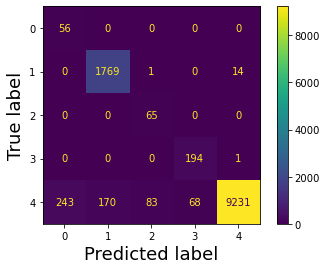

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(30,30))
#Compute confusion matrix to evaluate the accuray of a classification
confusion_table = confusion_matrix(y_test,l_pred)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table, display_labels=[0,1,2,3,4])

#create the plot
cm_display.plot()

#display the plot
plt.show()


 ### 0 - 'Harmful_Traditional_practice', 1 - 'Physical_violence', 2 - 'economic_violence', 3 - 'emotional_violence',  4 - 'sexual_violence'   

In [29]:
# how to save the model into the folder 
import joblib

joblib.dump(l_Classifier, 'GBV/model/LGBMClassifier.pkl')

['GBV/model/LGBMClassifier.pkl']